# Mounthly Electricity Statistics

Informe sobre el conjunto de datos de producción eléctrica en los países miembros de la OCDE:

***Descripción completa:***
Este conjunto de datos proviene de la International Energy Agency (IEA) y se refiere a la producción eléctrica neta en los países miembros de la OCDE durante un periodo de tiempo específico. Contiene información sobre el balance de producción eléctrica, los productos y las fuentes de energía utilizadas para generar electricidad. El número de muestras y variables puede variar dependiendo de la disponibilidad de datos en cada país miembro de la OCDE.

***Las variables en este conjunto de datos son:***

- País: países miembros de la OCDE
- Periodo de tiempo: específico
- Balance: producción eléctrica neta
- Producto: energía eléctrica
- Fuentes de energía utilizadas: combustibles fósiles, energías renovables, etc.
- Todas las variables son cuantitativas, ya que se refieren a cantidades numéricas medidas en GWh.


***Fuente:*** Este conjunto de datos se obtuvo de la página web de la IEA en: https://www.iea.org/data-and-statistics/data-product/monthly-electricity-statistics

***Razones para la selección:***
Este conjunto de datos ha sido seleccionado por el alumno porque es relevante para el estudio del uso de energías renovables y su impacto en la producción eléctrica de los países miembros de la OCDE. En este caso, se desea conocer el porcentaje de producción eléctrica en cada país miembro de la OCDE que proviene de fuentes renovables y compararlo con la producción a partir de combustibles fósiles. Además, se desea analizar cómo se distribuye la producción eléctrica entre diferentes fuentes renovables y combustibles fósiles en los diferentes países miembros de la OCDE. Esto proporcionará información valiosa sobre los esfuerzos de cada país para reducir su dependencia de combustibles fósiles y aumentar su uso de energías renovables.


`Guillermo Leiro Arroyo`

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the CSV as a dataframe and ignoring the header lines regarding licensing.
raw_df = pd.read_csv("MES_0922.csv", header=8)

## Data structure

The data contains 6 differents colums with the following data:
1.   `Country`: Country of origin.
1.   `Time`: Time stamp of the trade or consumption.
1.   `Balance`: What the energy was used for.
1.   `Product`: Origin or source of the energy.
1.   `Value`: Quantity of of energy in GWh
1.   `Unit`: GWh (All the units are spresed in GWh as we can see bellow.)

In [3]:
raw_df.columns

Index(['Country', 'Time', 'Balance', 'Product', 'Value', 'Unit'], dtype='object')

In [4]:
# A little preview of our dataframe
raw_df.head(5)

,Country,Time,Balance,Product,Value,Unit
0,Australia,September 2022,Net Electricity Production,Electricity,21161.5036,GWh
1,Australia,September 2022,Net Electricity Production,Total Combustible Fuels,13777.8878,GWh
2,Australia,September 2022,Net Electricity Production,"Coal, Peat and Manufactured Gases",9631.9664,GWh
3,Australia,September 2022,Net Electricity Production,Oil and Petroleum Products,333.9555,GWh
4,Australia,September 2022,Net Electricity Production,Natural Gas,3566.2116,GWh


In [5]:
# Possible values for column "Balance".
raw_df.Balance.unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Final Consumption (Calculated)',
       'Total Imports', 'Total Exports'], dtype=object)

In [6]:
# Possible values for column "Product"
raw_df.Product.unique()

array(['Electricity', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Hydro', 'Wind', 'Solar',
       'Total Renewables (Geo, Solar, Wind, Other)',
       'Other Combustible Non-Renewables', 'Geothermal', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

In [7]:
# Prove that only "GWh" are used.
raw_df.Unit.unique()

array(['GWh'], dtype=object)

In [8]:
# Diferent country of regions on column "Country"
raw_df.Country.unique()
#len(mes.Country.unique())

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Republic of Turkiye', 'United Kingdom',
       'United States', 'OECD Americas', 'OECD Asia Oceania',
       'OECD Europe', 'OECD Total', 'IEA Total', 'Argentina', 'Brazil',
       'Bulgaria', "People's Republic of China", 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia'],
      dtype=object)

In [9]:
raw_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Value
count,126323.00
mean,18386.51
std,78703.26
min,-19.22
25%,52.83
50%,664.51
75%,4245.31
max,1005747.88


## Data modifications with Pandas

In [10]:
# Copy the dataframe to our new dataframe varible, so this cell can be rerunned with out problems.
df = raw_df
# Selecting only the data related with Electricity Production for all the avaliable entries.
#df = df[df['Balance'] == 'Net Electricity Production']
# Passing Time to a Pandas user friendly time format.
df['Time'] = pd.to_datetime(df['Time'])
# Droping unnecesary columns.
#df = df.drop(['Unit', 'Balance'], axis=1)
# Removing unwanted Countries from our dataset.
#df = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe', 'OECD Total', 'IEA Total']) == False]
# Removing unwanted Products.
#df = df[df['Product'].isin(['Electricity', 'Total Combustible Fuels','Total Renewables (Geo, Solar, Wind, Other)']) == False]
df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,2022-09-01,Net Electricity Production,Electricity,21161.5036,GWh
1,Australia,2022-09-01,Net Electricity Production,Total Combustible Fuels,13777.8878,GWh
2,Australia,2022-09-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",9631.9664,GWh
3,Australia,2022-09-01,Net Electricity Production,Oil and Petroleum Products,333.9555,GWh
4,Australia,2022-09-01,Net Electricity Production,Natural Gas,3566.2116,GWh


# Single variable hipothesis

1.   [Amount of reports to the `IEA` by country.](#section_1)
2.   [Net energy production by country.](#net-energy-production-by-country.)
3.   [Submissions over time evolution.](#submissions-over-time-evolution)


<a id="section_1"></a>
### Reports to the `IEA` by country.

<AxesSubplot: title={'center': 'Reports to the IEA by Country'}, xlabel='Countries', ylabel='Reports Frecuency'>

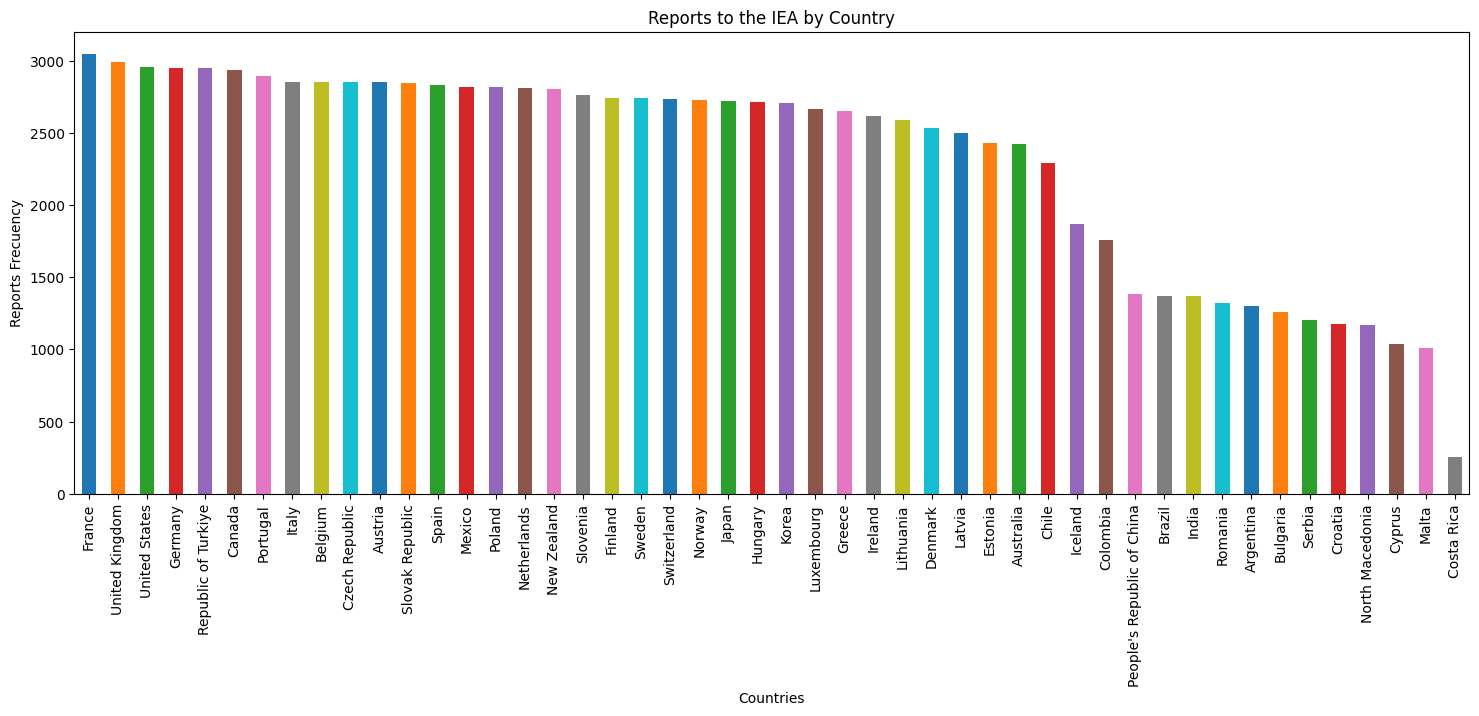

In [262]:
# Removing unwanted Countries from our dataset.
df_reports_per_country = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe', 'OECD Total', 'IEA Total']) == False]

df_reports_per_country['Country'].value_counts().plot.bar(figsize=(18, 6),
    xlabel = "Countries",
    ylabel = "Reports Frecuency",
    title='Reports to the IEA by Country',
    color = ["C"+str(i) for i in range(df['Country'].value_counts().count())],
)

<a id="section_2"></a>
### 2. Net energy production by country.

<AxesSubplot: title={'center': 'Net Energy Production'}, xlabel='Countries', ylabel='GWh'>

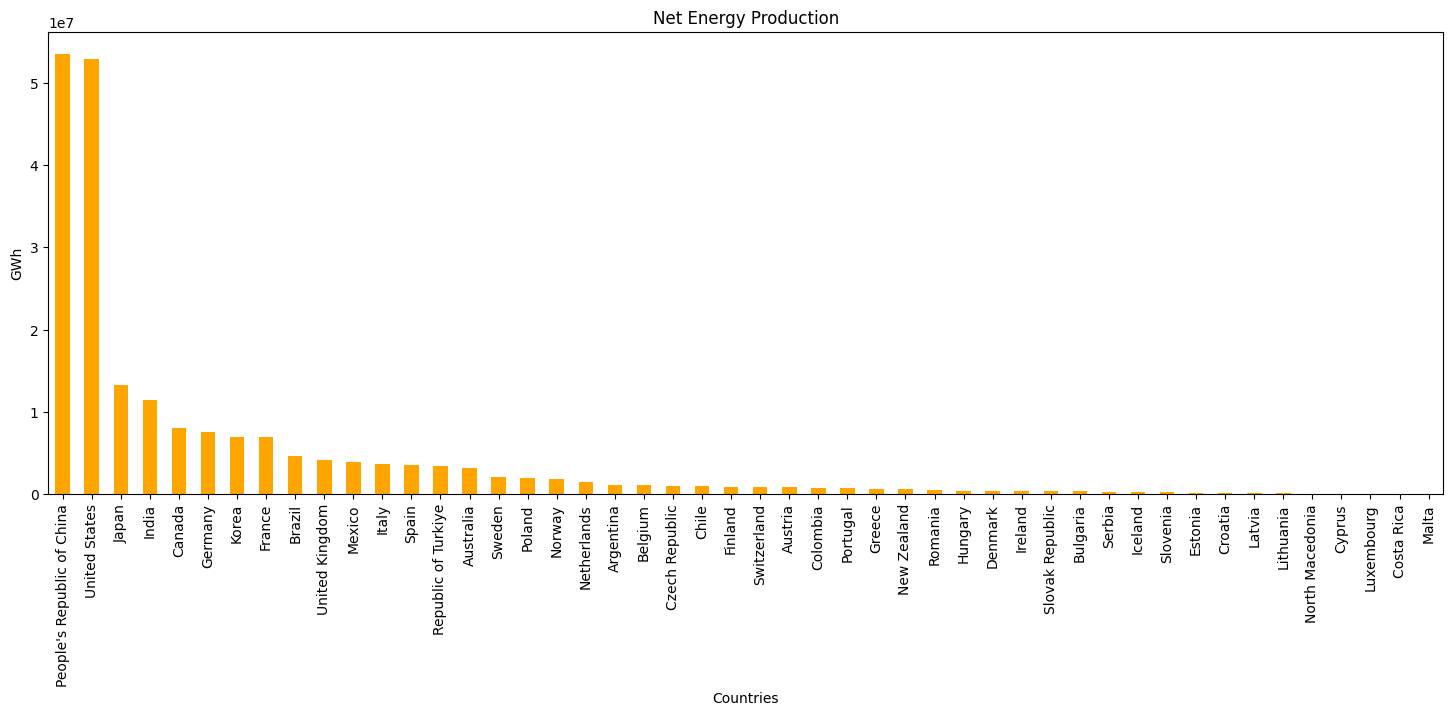

In [12]:
# Removing unwanted Countries from our dataset.
df_2 = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe', 'OECD Total', 'IEA Total']) == False]
# Removing unwanted Products.
df_2 = df_2[df_2['Product'].isin(['Electricity', 'Total Combustible Fuels','Total Renewables (Geo, Solar, Wind, Other)']) == False]

df_2.groupby('Country').sum('Value').sort_values('Value', ascending=False).plot.bar(figsize=(18, 6),
    xlabel = "Countries",
    ylabel = "GWh",
    title='Net Energy Production',
    color = "orange",
    legend = False,
)

<a id="section_3"></a>
### 3. Submissions over time evolution.

<AxesSubplot: title={'center': 'Submited reports.'}, xlabel='Time line', ylabel='Reports Frecuency'>

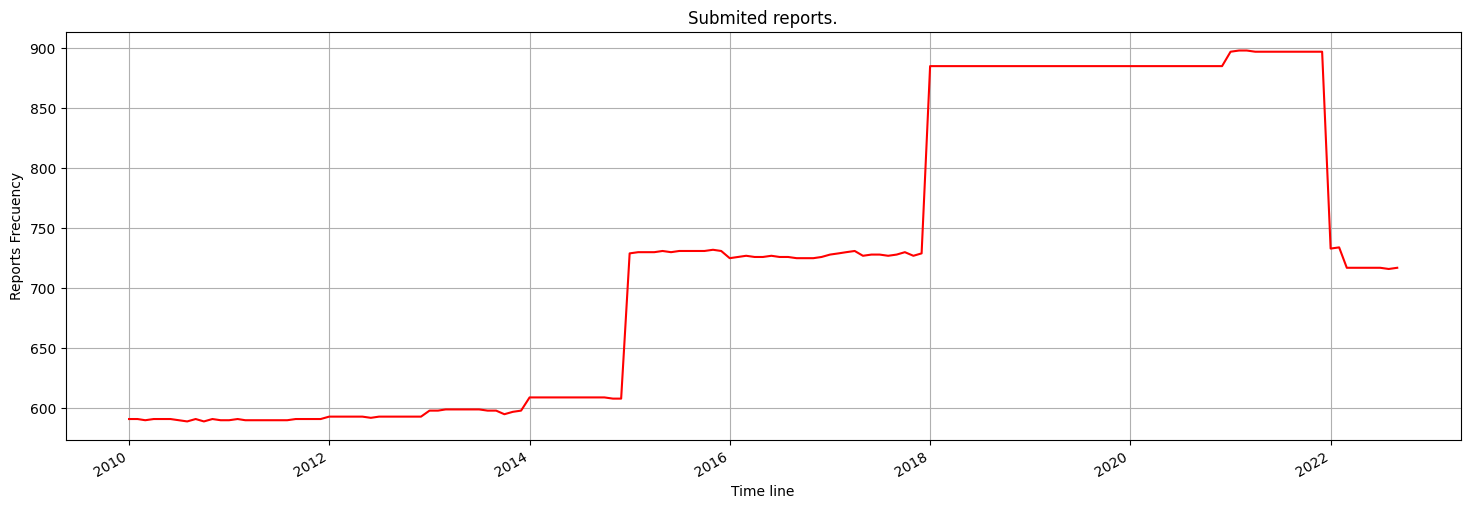

In [14]:
# Removing unwanted Countries from our dataset.
df_3 = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe', 'OECD Total', 'IEA Total']) == False]

#df_3['Time_ISO'] = pd.to_datetime(df_3['Time'])

df_3.sort_values(by = 'Time')['Time'].value_counts().plot.line(figsize=(18, 6),
    title = 'Submited reports.',
    xlabel = "Time line",
    ylabel = "Reports Frecuency",
    grid = True,
    color = 'red'
)

## Two variable hipothesys
4.   [Are the reports of energy getting bigger?](#section_4)
5.   [Which are the most coumont types of reports designated by the `Balance` column?](#section_5)
6.   [Which products or types of souces for the energy are the ones more frequently reported?](#section_6)


<a id="section_4"></a>
### 4. Energy production types by country.

<AxesSubplot: xlabel='Country'>

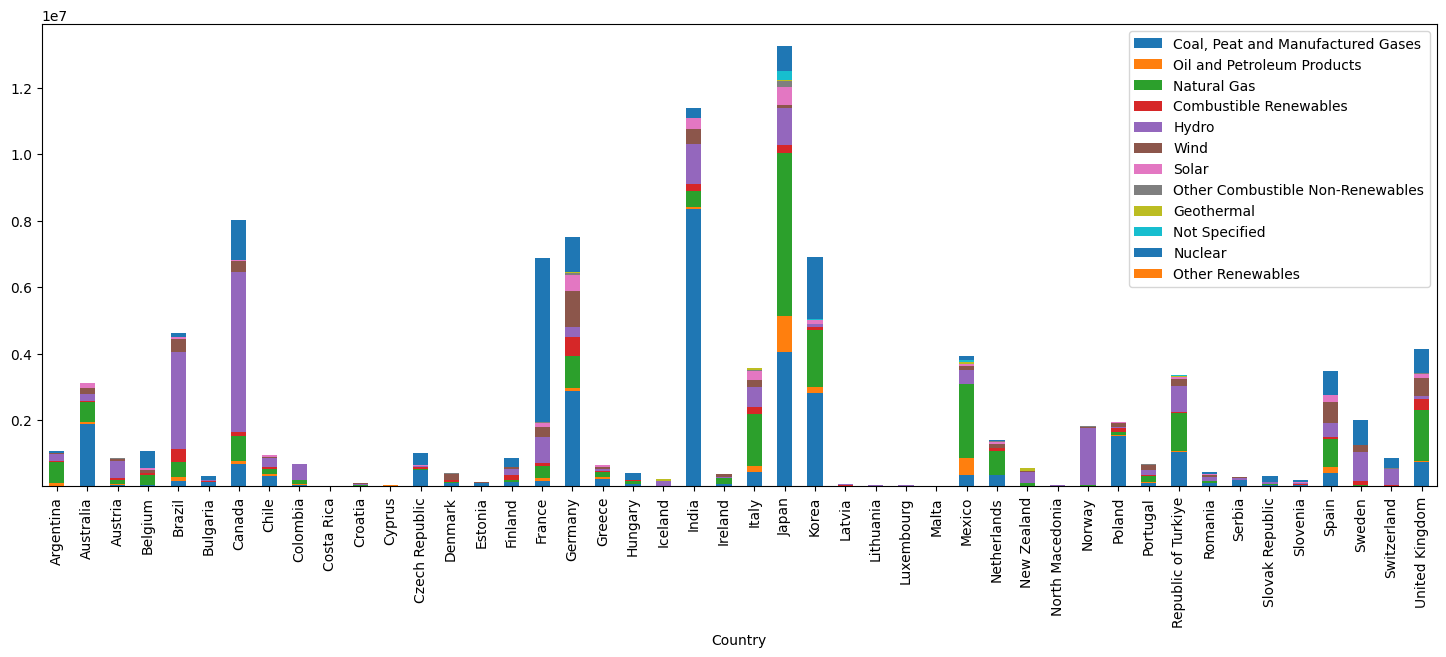

In [295]:
# Removing unwanted Countries from our dataset.
df_4 = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe', 'OECD Total', 'IEA Total']) == False]
# Removing unwanted Products.
df_4 = df_4[df_4['Product'].isin(['Electricity', 'Total Combustible Fuels','Total Renewables (Geo, Solar, Wind, Other)']) == False]

keys = df.Product.unique().tolist()

cols = len(fliped_df.columns)
process_data = {}
for index, row in df_4.groupby(['Country', 'Product']).sum('Value').iterrows():
    if index[0] not in process_data.keys():
        process_data[index[0]] = {'Country': index[0], index[1]: row['Value']}
    else:
        process_data[index[0]][index[1]] = row['Value'] 

fliped_df = pd.DataFrame(columns = ['Country'] + df_4.Product.unique().tolist(), data=list(process_data.values()))

fliped_df[fliped_df['Country'].isin(["People's Republic of China", 'United States']) == False].plot.bar(
    stacked=True, 
    x='Country', 
    figsize=(18, 6),
)



<AxesSubplot: xlabel='Country'>

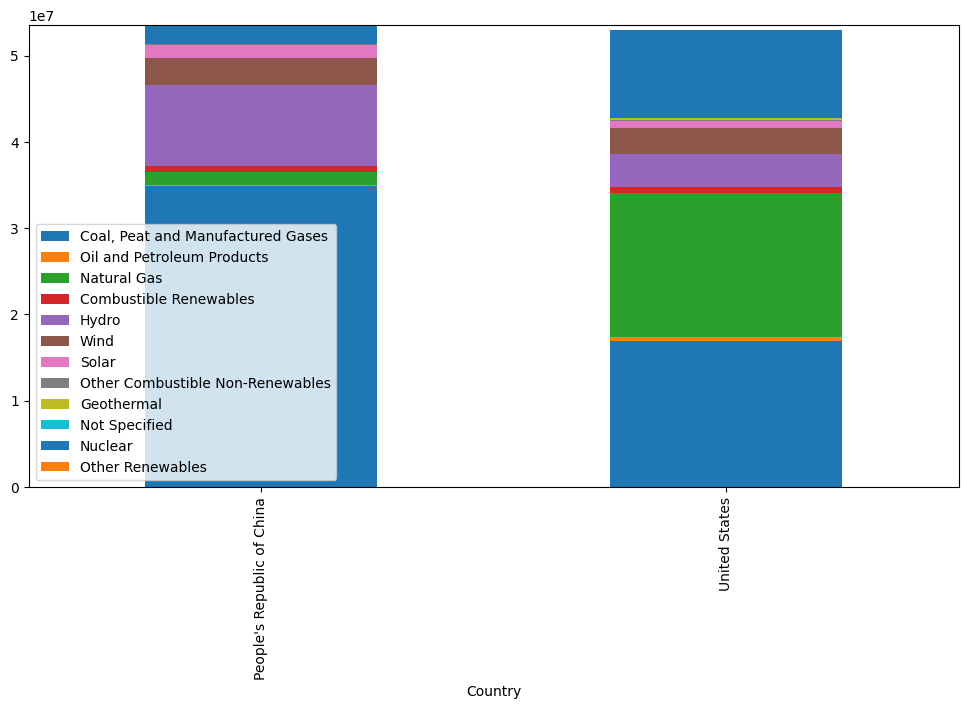

In [149]:
fliped_df[fliped_df['Country'].isin(["People's Republic of China", 'United States'])].plot.bar(
    stacked=True, 
    x='Country', 
    figsize=(12, 6),
)


<AxesSubplot: xlabel='Country', ylabel='Value'>

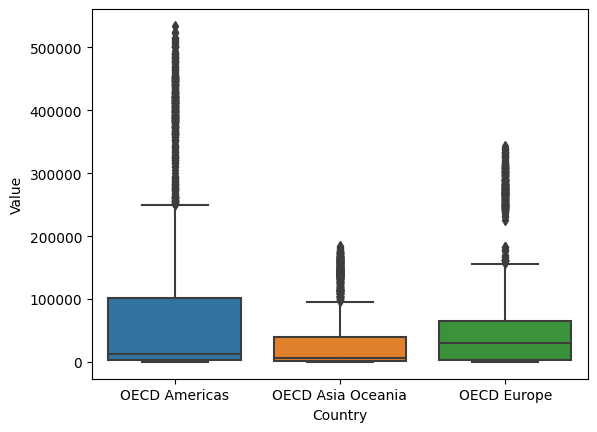

In [148]:
sns.boxplot(x = 'Country', y = 'Value', data = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe'])])

<a id="section_6"></a>
### 6. Increment of the reported energy over time.

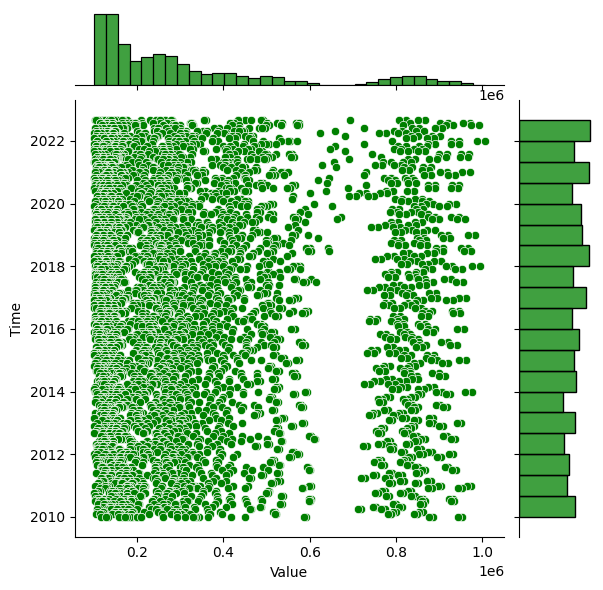

In [162]:
sns.jointplot(x="Value", y="Time", data=df[df.Value > 100000], kind="scatter", color='green')

#[df.Country.isin(["Spain", "Chile"]) == False][df.Value > 200000]

## Multiple graphs hipothesys

7.   [Which countries report more information to the IEA?](#section_7)
8.   [Which are the most coumont types of reports designated by the `Balance` column?](#section_8)
9.   [Which products or types of souces for the energy are the ones more frequently reported?](#section_9)

<a id="section_7"></a>
### 7. Wind vs Solar by region

/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_17051/4023270022.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Americas'].groupby('Product').sum().plot.pie(
/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_17051/4023270022.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Americas'].groupby('Product').sum().plot.pie(
/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_17051/4023270022.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Asia Oceania'].groupby('Product').sum().plot.pie(
/var/folders/1v/lt8k31

<AxesSubplot: title={'center': 'Total'}>

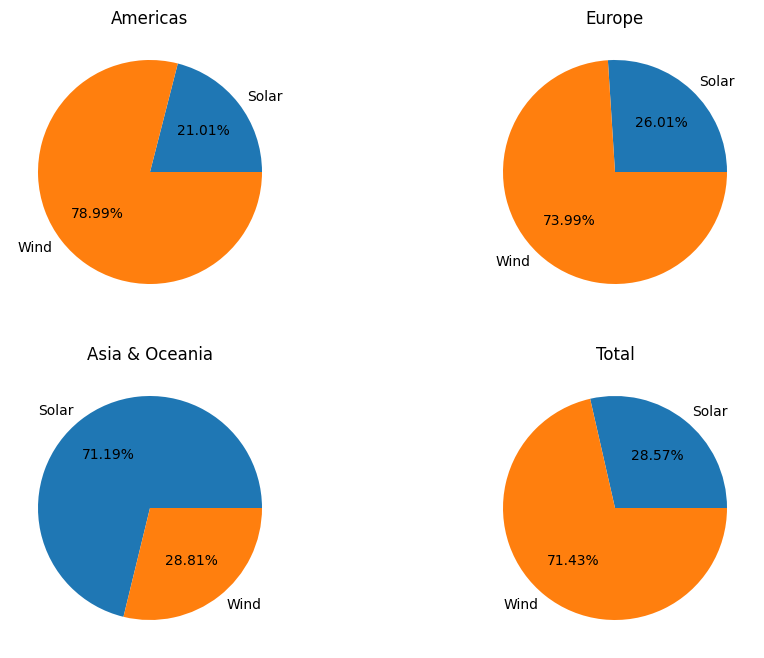

In [235]:
fig, axarr = plt.subplots(2, 2, figsize=(11, 8))

df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Americas'].groupby('Product').sum().plot.pie(
    y='Value', 
    title = 'Americas',
    ylabel = "",
    autopct='%1.2f%%',
    legend=False,
    ax=axarr[0][0])
df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Asia Oceania'].groupby('Product').sum().plot.pie(
    y='Value', 
    title = 'Asia & Oceania',
    ylabel = "",
    autopct='%1.2f%%',
    legend=False,
    ax=axarr[1][0])
df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Europe'].groupby('Product').sum().plot.pie(
    y='Value', 
    title = 'Europe',
    ylabel = "",
    autopct='%1.2f%%',
    legend=False,
    ax=axarr[0][1])
df[df['Product'].isin(['Solar', 'Wind'])][df['Country'] == 'OECD Total'].groupby('Product').sum().plot.pie(
    y='Value',
    title = 'Total',
    ylabel = "",
    autopct='%1.2f%%',
    legend=False,
     ax=axarr[1][1])

<a id="section_8"></a>
### Top 5 countries on renovavles

<AxesSubplot: title={'center': 'Natural Gas'}, xlabel='Country'>

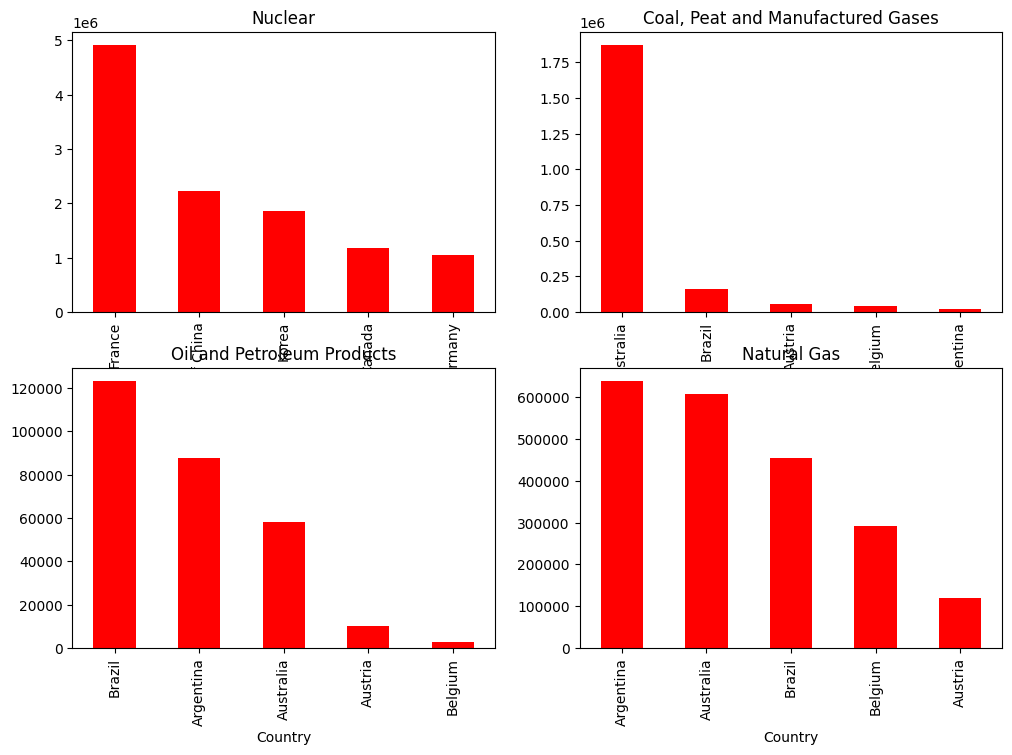

In [294]:
fig, axarr = plt.subplots(2, 2, figsize=(11, 8))

df_8 = fliped_df[fliped_df['Nuclear'] > 1000000]

df_8.set_index('Country')['Nuclear'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Nuclear',
    color = 'red',
    ax=axarr[0][0])
fliped_df.set_index('Country')['Coal, Peat and Manufactured Gases'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Coal, Peat and Manufactured Gases',
    color = 'red',
    ax=axarr[0][1])
fliped_df.set_index('Country')['Oil and Petroleum Products'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Oil and Petroleum Products',
    color = 'red',
    ax=axarr[1][0])
fliped_df.set_index('Country')['Natural Gas'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Natural Gas',
    color = 'red',
    ax=axarr[1][1])

<a id="section_9"></a>
### Top 5 countries on renovavles

<AxesSubplot: title={'center': 'Geothermal'}, xlabel='Country'>

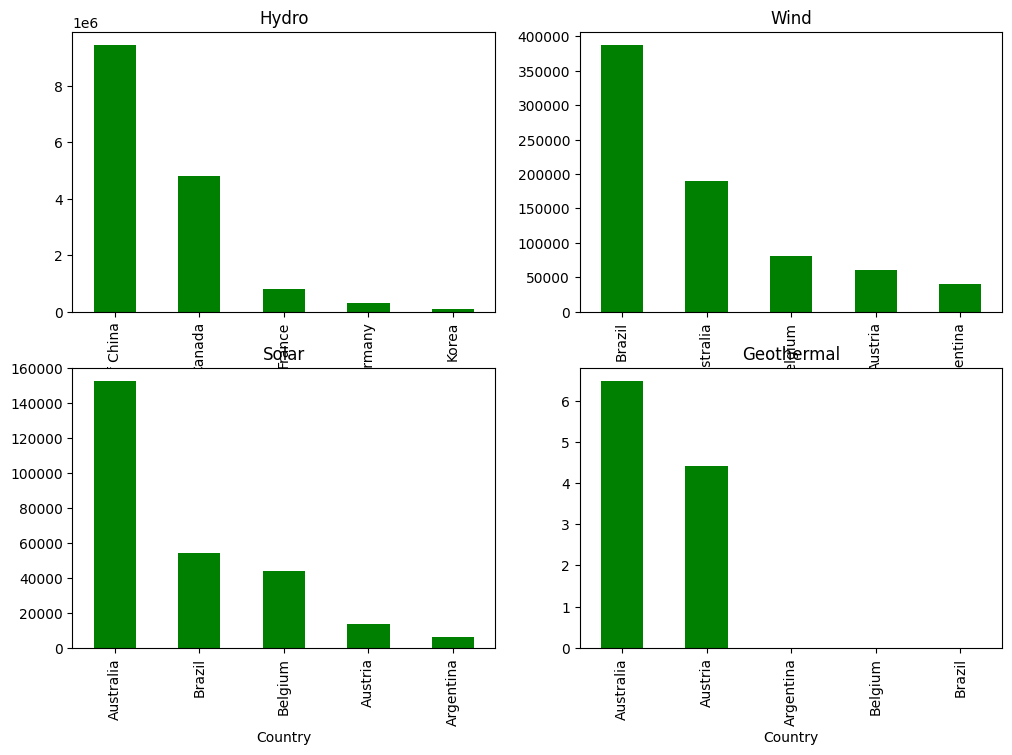

In [296]:
fig, axarr = plt.subplots(2, 2, figsize=(11, 8))

df_8 = fliped_df[fliped_df['Nuclear'] > 1000000]

df_8.set_index('Country')['Hydro'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Hydro',
    color = 'green',
    ax=axarr[0][0])
fliped_df.set_index('Country')['Wind'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Wind',
    color = 'green',
    ax=axarr[0][1])
fliped_df.set_index('Country')['Solar'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Solar',
    color = 'green',
    ax=axarr[1][0])
fliped_df.set_index('Country')['Geothermal'].head(5).sort_values(ascending=False).plot.bar(
    xlabel='Country', 
    figsize=(12, 8),
    title = 'Geothermal',
    color = 'green',
    ax=axarr[1][1])